In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('D:\\doc\\kidney_disease (1).csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
df.rename(columns={'classification':'class'},inplace=True)

In [4]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,...,44,7800,5.2,1.0,1,0,1.0,0.0,0.0,1.0
1,1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,...,38,6000,NaN,0.0,0,0,1.0,0.0,0.0,1.0
2,2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,...,31,7500,NaN,0.0,1,0,0.0,0.0,1.0,1.0
3,3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,...,32,6700,3.9,1.0,0,0,0.0,1.0,1.0,1.0
4,4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,...,35,7300,4.6,0.0,0,0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,...,47,6700,4.9,0.0,0,0,1.0,0.0,0.0,0.0
396,396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,...,54,7800,6.2,0.0,0,0,1.0,0.0,0.0,0.0
397,397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,...,49,6600,5.4,0.0,0,0,1.0,0.0,0.0,0.0
398,398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,...,51,7200,5.9,0.0,0,0,1.0,0.0,0.0,0.0


In [5]:
# Further cleaning
df['pe'] = df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
df.drop('id',axis=1,inplace=True)

In [6]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,47,6700,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,54,7800,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,49,6600,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,51,7200,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
df2 = df.dropna(axis=0)
df2['class'].value_counts()

0.0    115
1.0     43
Name: class, dtype: int64

In [8]:
df2

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
9,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,70.0,...,29,12100,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1.0
11,63.0,70.0,1.010,3.0,0.0,1.0,1.0,1.0,0.0,380.0,...,32,4500,3.8,1.0,1.0,0.0,0.0,1.0,0.0,1.0
14,68.0,80.0,1.010,3.0,2.0,0.0,1.0,1.0,1.0,157.0,...,16,11000,2.6,1.0,1.0,1.0,0.0,1.0,0.0,1.0
20,61.0,80.0,1.015,2.0,0.0,1.0,1.0,0.0,0.0,173.0,...,24,9200,3.2,1.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,47,6700,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,54,7800,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,49,6600,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,51,7200,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [9]:
df2.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [10]:
df2 = df2.drop(labels = ['class'],axis = 1)

In [11]:
df2.describ

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,sc,sod,pot,hemo,htn,dm,cad,appet,pe,ane
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,...,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,49.563291,74.050633,1.019873,0.797468,0.253165,0.113924,0.183544,0.088608,0.075949,131.341772,...,2.188608,138.848101,4.636709,13.687342,0.215190,0.177215,0.069620,0.879747,0.126582,0.101266
std,15.512244,11.175381,0.005499,1.413130,0.813397,0.318729,0.388343,0.285080,0.265759,64.939832,...,3.077615,7.489421,3.476351,2.882204,0.412261,0.383065,0.255315,0.326292,0.333562,0.302640
min,6.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,...,0.400000,111.000000,2.500000,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.250000,60.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,97.000000,...,0.700000,135.000000,3.700000,12.600000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,50.500000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,115.500000,...,1.100000,139.000000,4.500000,14.250000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,60.000000,80.000000,1.025000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,131.750000,...,1.600000,144.000000,4.900000,15.775000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,83.000000,110.000000,1.025000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,15.200000,150.000000,47.000000,17.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df2)

In [13]:
df = pd.DataFrame(data = scaled_data,columns = df2.columns)

In [14]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
count,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,...,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02
mean,1.032929e-16,7.406171e-16,-1.624580e-15,-7.757508e-16,-2.108018e-18,9.408789e-16,1.349132e-16,3.920914e-16,6.520804e-16,-9.755075e-17,...,2.051805e-16,-2.220446e-16,9.345548e-17,1.068063e-16,5.719757e-16,3.478230e-16,-3.941994e-16,3.913887e-16,8.291539e-16,7.869935e-17
std,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,...,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00
min,-2.817246e+00,-2.158952e+00,-2.713365e+00,-5.661221e-01,-3.122333e-01,-3.585686e-01,-4.741373e-01,-3.118048e-01,-2.866911e-01,-9.475974e-01,...,-3.685029e+00,-3.626776e+00,-1.500159e+00,-2.747446e+00,-5.236349e-01,-4.640955e-01,-2.735506e-01,-2.704772e+00,-3.806935e-01,-3.356725e-01
25%,-6.669624e-01,-1.261282e+00,2.309247e-02,-5.661221e-01,-3.122333e-01,-3.585686e-01,-4.741373e-01,-3.118048e-01,-2.866911e-01,-5.305059e-01,...,-3.784601e-01,-4.867313e-01,-6.259123e-01,-3.855519e-01,-5.236349e-01,-4.640955e-01,-2.735506e-01,3.697170e-01,-3.806935e-01,-3.356725e-01
50%,6.057713e-02,5.340564e-01,2.309247e-02,-5.661221e-01,-3.122333e-01,-3.585686e-01,-4.741373e-01,-3.118048e-01,-2.866911e-01,-2.447210e-01,...,1.958388e-01,2.294192e-01,-2.168611e-01,5.730335e-02,-5.236349e-01,-4.640955e-01,-2.735506e-01,3.697170e-01,-3.806935e-01,-3.356725e-01
75%,6.749439e-01,5.340564e-01,9.352451e-01,1.437770e-01,-3.122333e-01,-3.585686e-01,-4.741373e-01,-3.118048e-01,-2.866911e-01,6.306235e-03,...,7.266301e-01,6.701272e-01,4.167672e-01,6.969831e-01,-5.236349e-01,-4.640955e-01,-2.735506e-01,3.697170e-01,-3.806935e-01,-3.356725e-01
max,2.162358e+00,3.227064e+00,9.352451e-01,2.273474e+00,5.854375e+00,2.788867e+00,2.109094e+00,3.207135e+00,3.488075e+00,5.540492e+00,...,1.431451e+00,1.331189e+00,5.750474e+00,3.058878e+00,1.909727e+00,2.154729e+00,3.655631e+00,3.697170e-01,2.626785e+00,2.979094e+00


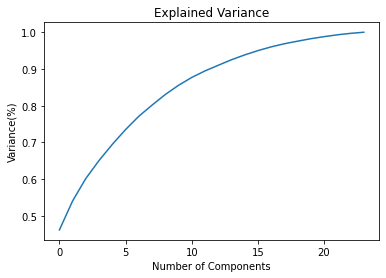

In [15]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance(%)')
plt.title('Explained Variance')
plt.show()

From the diagram above, it can be seen that 10 principal components explain almost 90% of the variance in data and 15 principal components explain around 95% of the variance in data.

So, instead of giving all columns as input, we would only feed these 10 principal components of the data to the machine learning algorithm and we would obtain a similar result. 

In [16]:
pca = PCA(n_components = 10)
new_data = pca.fit_transform(df)
principal_Df = pd.DataFrame(data = new_data
             , columns = ['principal component1','principal component2','principal component3','principal component4','principal component5','principal component6','principal component7','principal component8','principal component9','principal component10'])

In [19]:
principal_Df.head()

,principal component1,principal component2,principal component3,principal component4,principal component5,principal component6,principal component7,principal component8,principal component9,principal component10
0,5.727301,-3.535096,-2.087180,1.274524,0.369044,-1.030442,-1.184711,1.843214,0.483474,3.035417
1,6.205816,-3.283717,-0.549969,0.986694,-1.855131,0.284097,0.951985,2.445017,-1.226105,0.748525
2,6.080082,1.198901,-1.737803,0.254880,-1.007705,0.869851,-2.784427,2.150497,-1.468028,1.395459
3,8.373242,1.555314,-1.523739,1.958542,1.867052,-2.177961,0.000361,-0.817853,0.398081,-0.219706
4,7.044920,-0.523491,0.380513,-0.527606,-2.094220,-0.202753,-1.153577,0.754600,-0.156090,-2.141417


Here, we see that earlier we had 21 columns in the data earlier. Now with the help of Scree plot and PCA, we have reduced the number of features to be used for model builiding to 10. This is the advantage of PCA. It drastically reduces the number of features, thereby considerably reducing the training time for the model.